<a href="https://colab.research.google.com/github/Hasnafi/LR/blob/main/LinearRegression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We will employ **linear regression** with two parameters ( w and b ) to predict the salaries of employees based on their years of experience.





In this notebook, we created a linear regression model represented by the equation:

                                            f(w, b)(x) = wx + b




To make our model fit our data well, we needed to find the best values for w and b.

We used a cost function J(w, b) to measure how well the model fits the data.
The goal was to **minimize this cost function** by adjusting w and b.

----

To find the best w and b, we used an algorithm called **gradient descent**:

Gradient descent iteratively updates the parameters in the direction of the steepest decrease in the cost function.



*   At each iteration, the gradients of the cost function with respect to each parameter (∂J/∂w and ∂J/∂b) are computed.

*   The parameters (w, b) are then adjusted by subtracting a fraction of the gradient multiplied by a chosen **learning rate**, which controls the size of each update.

*   This process continues until **convergence**, where the change in the cost function becomes negligible or reaches a predefined threshold.











In [ ]:
pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=89c7902acf18c869767f39e69aebd35922507da83ed1d5a35512b7ac60dadf04
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
import pandas as pd

In [ ]:
df = pd.read_csv('./Salary.csv')
x_train = df['YearsExperience']
y_train = df['Salary']

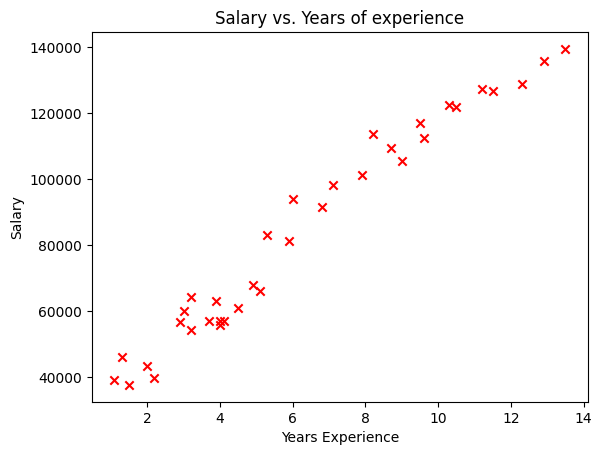

In [ ]:
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Salary vs. Years of experience")

# Set the y-axis label
plt.ylabel('Salary')

# Set the x-axis label
plt.xlabel('Years Experience')
plt.show()

In [ ]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)

The shape of x_train is: (35,)
The shape of y_train is:  (35,)


In [ ]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model ( Years of experience )
        y (ndarray): Shape (m,) Label ( The actual salary of employees )
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    total_cost = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        total_cost = total_cost + (f_wb - y[i])**2
    total_cost = total_cost / (2 * m)

    return total_cost

In [ ]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w: {cost:.3f}')

Cost at initial w: 4024507842.611


In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model ( Years of experience )
      y (ndarray): Shape (m,) Label ( The actual salary of employees )
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """

    # Number of training examples
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    # Loop over examples
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    # Divide both dj_dw and dj_db by m
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -640648.9571428571 -83945.6


In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(x)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

In [ ]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 963129946.81   
Iteration  150: Cost 61700408.67   
Iteration  300: Cost 39079064.69   
Iteration  450: Cost 28035993.42   
Iteration  600: Cost 22645092.55   
Iteration  750: Cost 20013414.13   
Iteration  900: Cost 18728706.55   
Iteration 1050: Cost 18101550.29   
Iteration 1200: Cost 17795391.14   
Iteration 1350: Cost 17645933.30   
w,b found by gradient descent: 8823.62945121624 28099.69843756822


In [ ]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

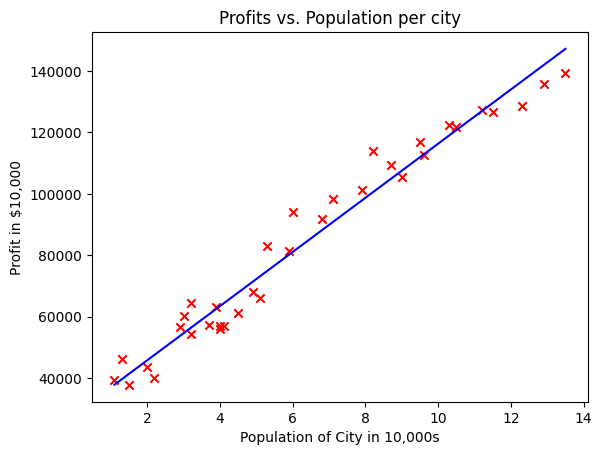

In [ ]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Salary vs. Years of experience")
# Set the y-axis label
plt.ylabel('Salary')
# Set the x-axis label
plt.xlabel('Years Experience')

In [ ]:
predict1 = 4.0 * w + b
print('For 4 years of experience , we predict a salary of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For 7 years of experience, we predict a profit of $%.2f' % (predict2*10000))

For 4 years of experience , we predict a salary of $633942162.42
For 7 years of experience, we predict a profit of $898651045.96
